1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import scipy

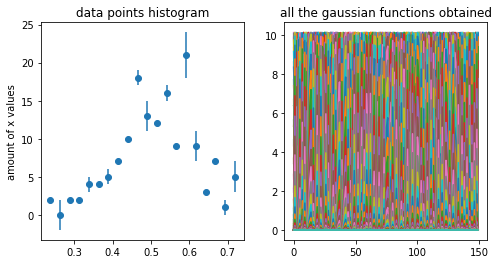

In [52]:
#Fill a numpy array, x, of len(N) with a variable normally distributed, with a given mean a standard deviation
mu=0.5
std = 0.1
N=150
x = np.random.normal(mu, std,N)

#Create 2 plots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
# title and label for the first plot
ax1.set_title('data points histogram')
ax1.set_ylabel('amount of x values')
ax2.set_title('all the gaussian functions obtained')

#Fill an histogram as data points with errors
counts,bin_edges = np.histogram(x,20)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2.
err=np.random.poisson(size=bin_centres.size)
ax1.errorbar(bin_centres, counts, yerr=err, fmt='o')


# create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned :

sd = 1.06*np.std(x)*np.size(x)**(-1/5) # std value
from scipy import stats

val= np.linspace(0,1,N)
gaussx= [stats.norm(xi, sd).pdf(val) for xi in x] # array of gaussian
ax2.plot(gaussx)

#Sum all the gaussian functions
s= np.sum(gaussx,0) 
# normalize the result 
normalize= scipy.integrate.trapz(x,s)


2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

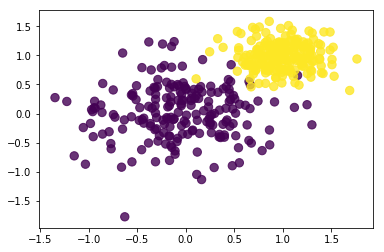

In [53]:
#! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('myfiles/two_categories_scatter_plot.png')

Text(0.5, 1.0, 'Home value as a function of home age & area population')

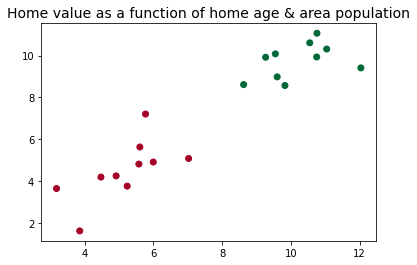

In [83]:
# Write a function that generate 2 2D datasets of 2 categories
import random 
def gener2Ddataset (mu1,mu2,std1,std2,N) :
    set1= []
    set2= []
    for i in range(N):  
        x1 =random.gauss(mu1, std1)
        y1 =random.gauss(mu1, std1)
        set1.append([x1,y1])
        x2 =random.gauss(mu2, std2)
        y2 =random.gauss(mu2, std2)
        set2.append([x2,y2])
    return(np.array(set1).T,np.array(set2).T)

N=10 # number of data per dataset
(set1,set2)=gener2Ddataset (5,10,1,1,N) 

# Display the dataset in a scatter plot marking the two categories with different marker colors.
fig, ax = plt.subplots()
ax.scatter(x=[set1[0],set2[0]], y=[set1[1],set2[1]],c=[[1 for i in range (N)],[2 for i in range (N)]],cmap='RdYlGn')
ax.set_title('Home value as a function of home age & area population', fontsize=14)


3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

dataframe clean :
        residuals  distances
0       1.100000       16.0
1      -1.950000        6.3
8      -0.042857        3.3
9       0.128571        5.3
10      0.085714       15.0
...          ...        ...
11126  -0.760000       14.4
11127   0.380000        7.5
11128   0.083333        1.7
11129   0.166667       19.1
11130   0.083333        2.6

[10489 rows x 2 columns]

linear regression residuals VS distances : 
 LinregressResult(slope=0.5779133666359259, intercept=10.025258299436526, rvalue=0.04340351052255908, pvalue=8.717037183576464e-06, stderr=0.1298980963225655)


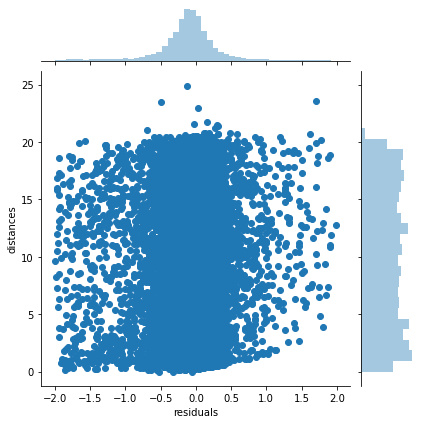

In [113]:
import pandas as pd
# load the file as an numpy array
data=np.load('myfiles/residuals_261.npy',allow_pickle=True)
# load it as a pandas dataframe
pdf=pd.DataFrame(data.item())

#selecting the entries (rows) with the variable "residual" in absolute value smaller than 2 :
pdfclean = pdf[abs(pdf['residuals'])<2]
print("dataframe clean :\n",pdfclean)

# perform a linear regression of "residuals" versus "distances"
print("\nlinear regression residuals VS distances : \n",stats.linregress(pdfclean['residuals'],pdfclean['distances']))

#plot a seaborn jointplot of "residuals" versus "distances"
import seaborn as sns
sns.jointplot(x="residuals", y="distances", data=pdfclean);

           


x: [ 2.  7. 12. 17. 22.]
y: [-0.19107143  0.04       -0.13357143 -0.1025     -0.43      ]
erry: [1.10508305 0.15132746 0.06424999 0.17837811 0.75620764]


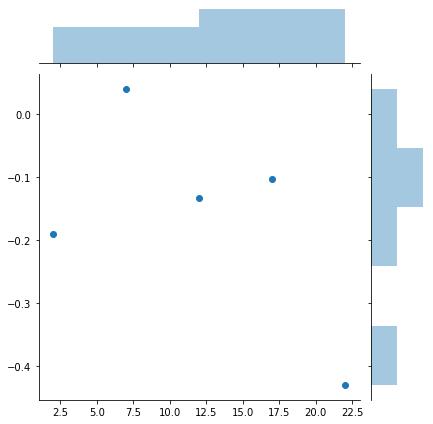

In [115]:
# array of bin centers for the "distance" variable.
x=np.linspace(2,22,5)
print("x:",x)
# the mean values of the "residuals"
y = np.array([ np.mean(pdfclean['residuals'][int(i-2):int(i+2)]) for i in x])
print("y:",y)
#the standard deviation of the of the "residuals"
erry =np.array([ np.std(pdfclean['residuals'][int(i-2):int(i+2)]) for i in x])
print("erry:",erry)

sns.jointplot(x=x, y=y, data=pdfclean);